In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
c_15 = np.loadtxt("../data/basis_functions/spiral_bfe_coefficients_15.csv")
c_30 = np.loadtxt("../data/basis_functions/spiral_bfe_coefficients_30.csv")
c_15 = c_15.reshape(16, 16, 2)
c_30 = c_30.reshape(31, 31, 2)

In [6]:
for i in range(16):
    for j in range(16):
        for k in range(2):
            if(c_30[i, j, k] != c_15[i, j, k]):
                print(i, j, k, c_30[i, j, k] - c_15[i, j, k])

In [10]:
for i in range(31):
    print(c_30[i, 2, 0])

22.6133
27.7654
25.0646
18.5189
13.4768
13.1471
13.9364
12.894
10.4564
8.3208
7.35963
6.74548
5.68168
4.29992
3.14614
2.57232
2.43474
2.40256
2.27795
2.02949
1.79151
1.70624
1.68868
1.56293
1.29607
0.994065
0.792698
0.744025
0.784827
0.82158
0.794488


In [11]:
for i in range(31):
    for j in range(31):
        if(j != 2 and abs(c_30[i, j, 0]) > 1e-14):
            print(i, j, c_30[i, j, 0])

In [4]:
density_terms = np.loadtxt("../data/basis_functions/spiral_density_terms.csv")
density_terms = density_terms.reshape(31, 61, 100)

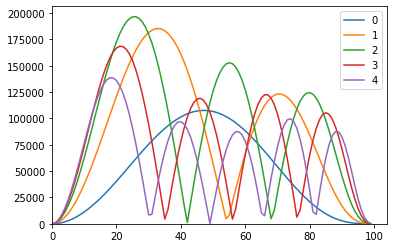

In [13]:
plt.figure()
for i in range(5):
        plt.plot((density_terms[i, 32, :]), label="{}".format(i))
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

No handles with labels found to put in legend.


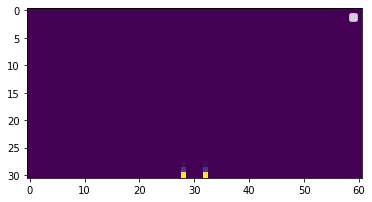

In [9]:
terms_max = np.max(density_terms, axis=2)
plt.imshow(terms_max)

In [47]:
alpha_Ka_values = np.loadtxt("../data/alpha_Ka_values.csv")
beta_Ka_values = np.loadtxt("../data/beta_Ka_values.csv")

k_max = 10
l_max = 50
n_max = 50
i_max = 10
j_max = 50

alpha_Ka_values = alpha_Ka_values.reshape(k_max + 1, l_max + 1, n_max + 1,
                                            i_max + 1, j_max + 1)
beta_Ka_values = beta_Ka_values.reshape(k_max + 1, l_max + 1, n_max + 1, j_max + 1)

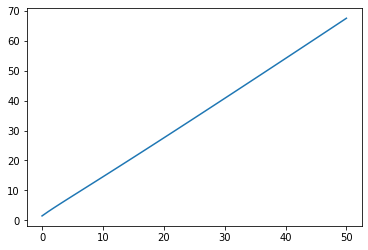

In [53]:
plt.plot(np.log(np.abs(np.array([alpha_Ka_values[4, 2, i, 2, i] for i in range(n_max + 1)]))))
plt.show()

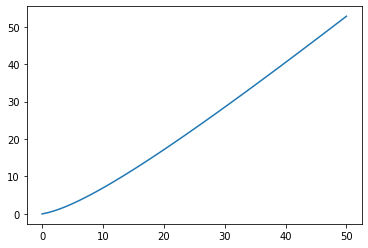

In [55]:
plt.plot(np.log(np.abs(np.array([beta_Ka_values[4, 2, i, i] for i in range(n_max + 1)]))))
plt.show()

We see that the alpha_Ka and beta_Ka coefficients increase exponentially with n. Therefore as we add basis functions with higher n, a given fractional precision on these coefficients will cause larger and larger errros and so deviation from orthonormality. Hence why in one of the plots above the basis functions suddenly stop behaving at around n = 20. If we change the tabulated values to long doubles, we get 1.5x the precision so hopefully a few more accurate basis functions. Actually, using boost/gmp, we may be able to used floats of arbitrary precision.